In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn as sk

## Ingresando datos crudos

In [59]:
raw_df = pd.read_csv('raw_data.csv', index_col='Index')
raw_df.tail()

,BWTDA,Area de Salida,Fecha,Orden/Pedido,Año,Mes,Dia,Bultos,Dia sem,Contenedores,Registro Valido,% Registro Valido
Index,,,,,,,,,,,,
35746,5537,Seco,44981,7223986,2023,2,24,511.0,5,14,OK,1.0
35747,5537,Seco,44981,7224183,2023,2,24,98.0,5,3,OK,1.0
35749,5537,Seco,44982,7225010,2023,2,25,183.0,6,4,OK,1.0
35756,5546,Seco,44928,7180897,2023,1,2,394.0,1,13,OK,1.0
35757,5546,Seco,44928,7180898,2023,1,2,63.0,1,1,OK,1.0


In [69]:
raw_df_20 = raw_df[raw_df['BWTDA'] == 35]
raw_df_20 = raw_df_20[(raw_df_20['Registro Valido'] == 'OK')]
raw_df_20.shape

(40, 12)

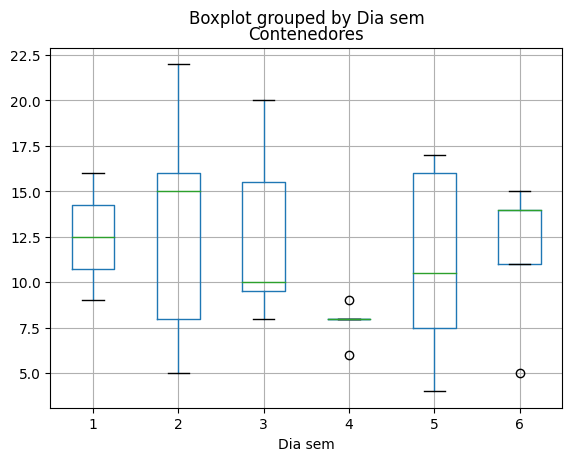

In [70]:


raw_df_20.rename(columns={'BWTDA':'Sucursal',}, inplace=True)
raw_df_20.replace("#N/D", np.NaN, regex=False, inplace=True)
raw_df_20.dropna(inplace=True)

raw_df_20['Dia sem']= raw_df_20['Dia sem'].astype(str)
# raw_df_2['Dia sem'].replace(weight_dict, regex=False, inplace=True)
# raw_df_train = raw_df[raw_df['Año'] == 2022]
# raw_df_test = raw_df[raw_df['Año'] == 2023]

raw_df_20.boxplot(column='Contenedores', by='Dia sem')
df_dummied = pd.get_dummies(raw_df_20[['Contenedores','Bultos','Dia sem']], dtype=int)



In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

model = LinearRegression()
model_2 = LinearRegression()
poly_feat = PolynomialFeatures(6)

In [72]:

poly_x = poly_feat.fit_transform(raw_df_20[['Bultos','Dia sem']])
# model.fit(poly_x, raw_df_20[['Contenedores']])
x_dummied = df_dummied.drop('Contenedores', axis=1)
poly_x_dummied = poly_feat.fit_transform(x_dummied)
# model_2.fit(poly_x_dummied, df_dummied[['Contenedores']])
# suc16_df_test_3['Dia sem']= suc16_df_test_3['Dia sem'].astype(str)
# suc16_df_test_3['Dia sem'].replace(weight_dict, regex=False, inplace=True)
# poly_x_test_3 = poly_feat_3.fit_transform(suc16_df_test_3)
# Y_hat_33 = ln3.predict(poly_x_test_3)
# Y_hat_33_plot = Y_hat_33[:,0]
# Y_hat_33
df_dummied

,Contenedores,Bultos,Dia sem_1,Dia sem_2,Dia sem_3,Dia sem_4,Dia sem_5,Dia sem_6
Index,,,,,,,,
1618,8,346.0,0,1,0,0,0,0
1622,20,973.0,0,0,1,0,0,0
1626,16,885.0,0,0,0,0,1,0
1630,11,785.0,0,0,0,0,0,1
1634,15,689.0,0,1,0,0,0,0
1638,17,965.0,0,0,1,0,0,0
1642,16,855.0,0,0,0,0,1,0
1643,4,73.0,0,0,0,0,1,0
1647,14,777.0,0,0,0,0,0,1


In [73]:

prediction_array = model.predict(poly_x)[:,0]
prediction_array_2 = model_2.predict(poly_x_dummied)[:,0]
predicted_df = pd.DataFrame(raw_df_20['Bultos'])
predicted_df['Contenedores'] = list(prediction_array_2)
predicted_df.sort_values('Bultos', inplace=True)
plt.figure(figsize=(16, 8))
plt.ylabel('Contenedores', size=15, fontweight = 'semibold')
plt.xlabel('Bultos', size=15, fontweight = 'semibold')
graph = plt.scatter(raw_df_20['Bultos'],raw_df_20['Contenedores'], s=15)
plt.plot(predicted_df['Bultos'], predicted_df['Contenedores'])


ValueError: in user code:

    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/engine/training.py", line 2169, in predict_function  *
        return step_function(self, iterator)
    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/engine/training.py", line 2155, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/engine/training.py", line 2143, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/engine/training.py", line 2111, in predict_step
        return self(x, training=False)
    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/saulrincon/Documents/analisis_jesus_dia/dia_analisis/lib/python3.10/site-packages/keras/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_2" is incompatible with the layer: expected shape=(None, 16), found shape=(None, 28)


In [19]:
r2_score(raw_df_20['Contenedores'],prediction_array_2)
# mean_squared_error(suc16_df_to_test['Contenedores'],Y_hat_33[:,0])


0.9680405383318763

# MODELANDO CON RED NEURONAL

In [74]:
import tensorflow as tf
import numpy as np
from sklearn.preprocessing import StandardScaler

# Define the degree of the polynomial you want to fit
degree = 4

X = x_dummied.values
scaler = StandardScaler()
X = scaler.fit_transform(X)

X_poly = np.concatenate([X**n for n in range(degree)], axis=1) #X**4], axis=1)#, X**5, X**6], axis=1)
# X_poly = np.concatenate([X, X**2, X**3], axis=1) #X**4], axis=1)#, X**5, X**6], axis=1)

y_array = df_dummied[['Contenedores']].values.reshape(-1, 1)
X_poly.shape
    

(40, 28)

Epoch 1/1200
2/2 [==============================] - 1s 106ms/step - loss: 138.8794 - mae: 10.6289 - val_loss: 91.8239 - val_mae: 9.1415
Epoch 2/1200
2/2 [==============================] - 0s 22ms/step - loss: 132.2147 - mae: 10.3035 - val_loss: 86.3846 - val_mae: 8.8407
Epoch 3/1200
2/2 [==============================] - 0s 22ms/step - loss: 126.5075 - mae: 10.0057 - val_loss: 81.4024 - val_mae: 8.5515
Epoch 4/1200
2/2 [==============================] - 0s 24ms/step - loss: 120.8607 - mae: 9.7165 - val_loss: 76.4752 - val_mae: 8.2574
Epoch 5/1200
2/2 [==============================] - 0s 22ms/step - loss: 115.3361 - mae: 9.4168 - val_loss: 71.4710 - val_mae: 7.9534
Epoch 6/1200
2/2 [==============================] - 0s 23ms/step - loss: 109.9880 - mae: 9.1223 - val_loss: 66.5074 - val_mae: 7.6454
Epoch 7/1200
2/2 [==============================] - 0s 24ms/step - loss: 104.7032 - mae: 8.8273 - val_loss: 61.7632 - val_mae: 7.3414
Epoch 8/1200
2/2 [==============================] - 0s 26m

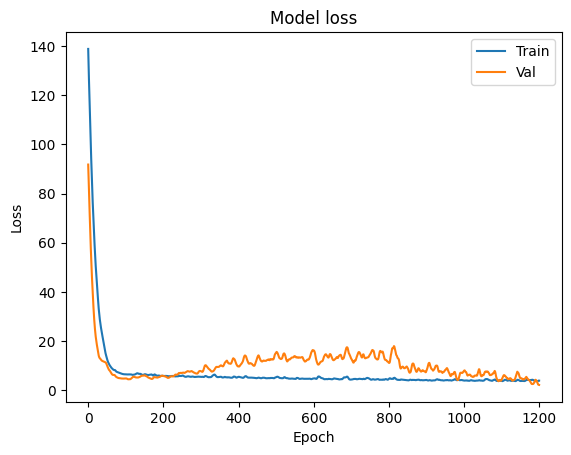

In [75]:
# Define the model architecture
model = tf.keras.Sequential([
  tf.keras.layers.Input(shape=(X_poly.shape[1],)),
  tf.keras.layers.Dense(32, activation='linear'),
  tf.keras.layers.Dense(16, activation='relu'),
  tf.keras.layers.Dense(1)
])

# Compile the model
model.compile(loss='mse', optimizer='adam', metrics=['mae'])

# Train the model on the input data and labels
history = model.fit(X_poly, y_array, epochs=1200, validation_split=.15)

# Use the trained model to make predictions on new data
# new_data = np.array([[10]])
# new_data_poly = np.zeros((new_data.shape[0], degree))
# # for i in range(degree):
# #     new_data_poly[:,i] = new_data[:,0]**(i+1)
# # new_data_poly = np.concatenate((new_data, new_data_poly), axis=1)
# prediction = model.predict(new_data_poly)

# # # Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.show()

In [76]:
prediction = model.predict(X_poly).round()
prediction[prediction<0] = 0
r2_score(df_dummied[['Contenedores']],prediction)


2/2 [==============================] - 0s 2ms/step


0.8012406222597512

In [52]:
from matplotlib import pyplot as plt


In [53]:
df_dummied[['Contenedores']]

,Contenedores
Index,
1284,11
1288,16
1292,12
1296,13
1301,18
1308,23
1312,20
1315,12
1319,18


,prediction,cont2,Bultos
7,3,4,73.0
25,5,5,313.0
20,6,5,325.0
0,7,8,346.0
10,8,8,375.0
11,8,10,563.0
15,9,8,664.0
17,8,6,668.0
32,6,8,681.0
4,14,15,689.0


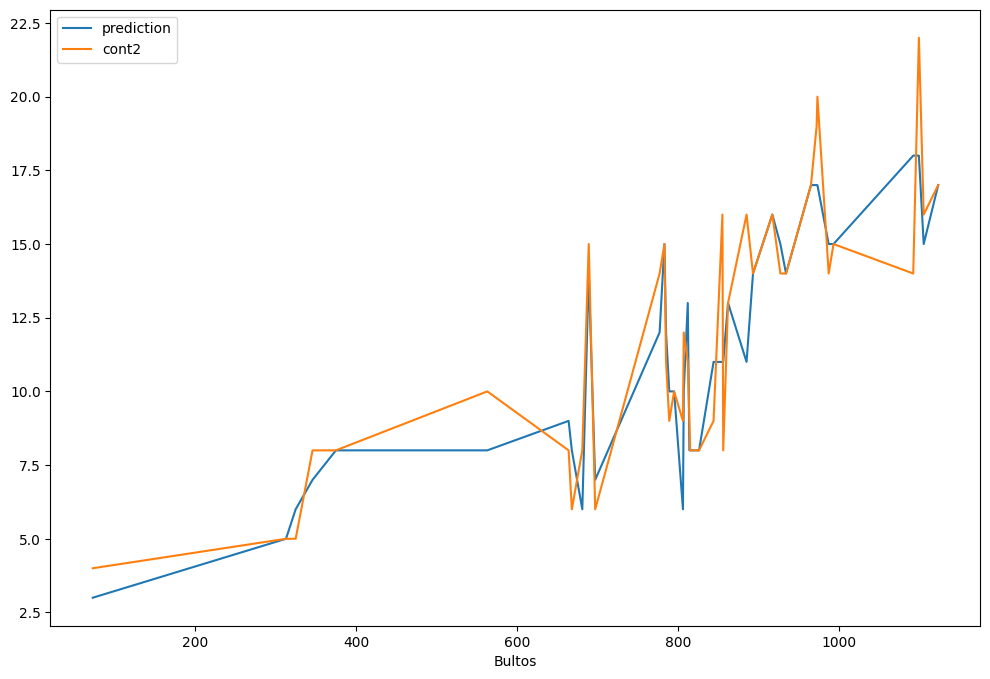

In [77]:
df5 = pd.DataFrame(prediction, columns=['prediction'], dtype=int)
df5['cont2'] = df_dummied[['Contenedores']].values
df5['Bultos'] = df_dummied[['Bultos']].values
df5 = df5.sort_values(by='Bultos')
df5.plot('Bultos', ['prediction','cont2'], figsize=(12,8))
df5


In [137]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Generate some random data
num_samples = 1000
num_features = 7

X = np.random.rand(num_samples, num_features)
y = np.sin(X) + 0.1 * np.random.randn(num_samples, 1)

# Add additional features for higher-degree polynomials
X = np.concatenate([X, X**2, X**3, X**4, X**5, X**6], axis=1)
X.shape
# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(42,)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])

# # Compile the model
model.compile(loss='mse', optimizer='adam')

# # # Train the model
# history = model.fit(X, y, epochs=50, validation_split=0.2)

# # # Plot the training and validation loss
# plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
# plt.title('Model loss')
# plt.ylabel('Loss')
# plt.xlabel('Epoch')
# plt.legend(['Train', 'Val'], loc='upper right')
# plt.show()
y

array([[ 0.2696616 ,  0.77500811,  0.19980022, ...,  0.85466884,
         0.50724965,  0.38317757],
       [ 0.36200696,  0.90823963,  0.57016245, ...,  0.35415012,
         0.8933771 ,  0.2208921 ],
       [ 0.66952417,  0.69524832,  0.28778732, ...,  0.74363452,
         0.1096252 ,  0.52199442],
       ...,
       [ 0.33298263,  0.62532493, -0.14813838, ..., -0.12748171,
         0.15006398,  0.63393244],
       [ 0.66104644,  0.026921  ,  0.82269861, ...,  0.28258852,
         0.42833122,  0.64889861],
       [ 0.56455549,  0.41328242,  0.49176677, ...,  0.39351599,
         0.57272284,  0.13885361]])